<a href="https://colab.research.google.com/github/jjiho/20141001-Lee-Jiho/blob/master/Assignment2_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

In [10]:
 # import data with numpy
from google.colab import drive
drive.mount('/content/gdrive/')

data = np.genfromtxt("/content/gdrive/My Drive/profit_population.txt", delimiter=',')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


[]

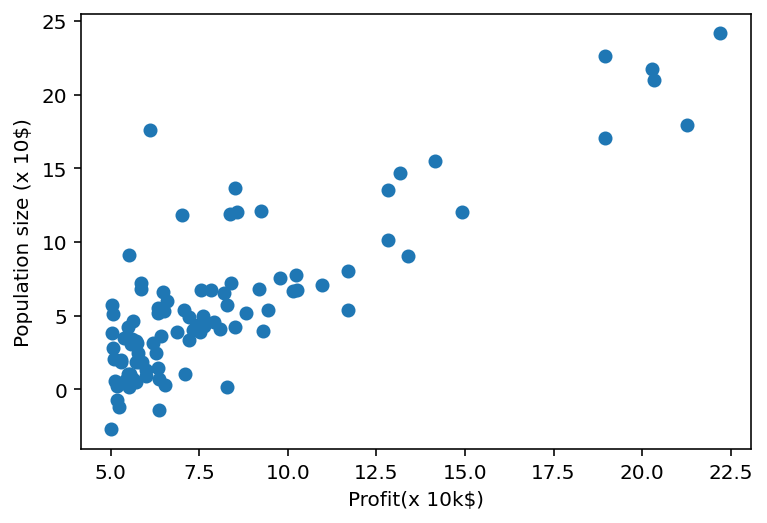

In [12]:
x_train = data[:,0]
y_train = data[:,1]

plt.figure()
plt.xlabel("Profit(x 10k$)")
plt.ylabel("Population size (x 10$)")
plt.scatter(x_train, y_train,)
plt.plot()

In [28]:
# construct data matrix
a = np.ones(len(x_train))
X = np.array([a, x_train])
X = X.T

# parameters vector
w = np.zeros((2, 1))

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)


In [41]:
 # loss function definition
def loss_mse(y_pred,y): 

    loss = (1 / len(x_train)) * np.dot((y_pred - y).T, (y_pred - y))
    
    return loss


# Test loss function 
y = y_train.T.reshape(len(y), 1)# label

loss = loss_mse(y_pred,y)
print(loss)

[[64.14546775]]
